In [80]:
import numpy as np;
import pandas as pd;

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

import matplotlib.pyplot as plt;

In [5]:
acs_data = pd.read_csv('../data/acs_5yr_merged.csv', index_col = 0);

In [15]:
acs_data.head()

,do_date,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,

In [19]:
missing = np.sum(acs_data.isnull(), axis = 0);
df = acs_data;
print(missing[missing > 0])

median_year_structure_built                                         6969
rent_burden_not_computed                                              35
rent_over_50_percent                                                  35
rent_40_to_50_percent                                                 35
rent_35_to_40_percent                                                 35
rent_30_to_35_percent                                                 35
rent_25_to_30_percent                                                 35
rent_20_to_25_percent                                                 35
rent_15_to_20_percent                                                 35
rent_10_to_15_percent                                                 35
rent_under_10_percent                                                 35
median_age                                                          4051
commuters_by_public_transportation                                    35
median_income                                      

In [27]:
for col in df.columns:
    if  np.sum(df[df[col].isnull()]) == 33120:
               print(df[df[col].isnull()].value_counts("do_date"))


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
df.columns

Index(['do_date', 'nonfamily_households', 'family_households',
       'median_year_structure_built', 'rent_burden_not_computed',
       'rent_over_50_percent', 'rent_40_to_50_percent',
       'rent_35_to_40_percent', 'rent_30_to_35_percent',
       'rent_25_to_30_percent',
       ...
       'pop_5_years_over', 'speak_only_english_at_home',
       'speak_spanish_at_home', 'speak_spanish_at_home_low_english',
       'pop_15_and_over', 'pop_never_married', 'pop_now_married',
       'pop_separated', 'pop_widowed', 'pop_divorced'],
      dtype='object', length=251)

In [120]:
def plot_missing(col):
    df = acs_data[acs_data[col].isnull()]
    df = df.reset_index()

    temp = df.groupby("geo_id").agg({"do_date": "count"})
    temp = temp.reset_index().groupby("do_date").agg({"geo_id": "count"})

    plt.bar(temp.index, temp["geo_id"])
    plt.title("Histogram of missing:" + col)
    plt.show()
    return;

In [91]:
df = acs_data[acs_data["median_year_structure_built"].isnull()]
df = df.reset_index()

In [92]:
temp = df.groupby("geo_id").agg({"do_date": "count"})
temp = temp.reset_index().groupby("do_date").agg({"geo_id": "count"})

In [107]:
acs_data[acs_data["gini_index"].isnull()].shape[0]

7118

In [117]:
curious_column = [x for x in acs_data.columns if (acs_data[acs_data[x].isnull()].shape[0] > 1100) & (acs_data[acs_data[x].isnull()].shape[0] % 33120 != 0)]

In [118]:
curious_column

['median_year_structure_built',
 'median_age',
 'median_income',
 'income_per_capita',
 'median_rent',
 'percent_income_spent_on_rent',
 'aggregate_travel_time_to_work',
 'renter_occupied_housing_units_paying_cash_median_gross_rent',
 'owner_occupied_housing_units_lower_value_quartile',
 'owner_occupied_housing_units_median_value',
 'owner_occupied_housing_units_upper_value_quartile',
 'gini_index']

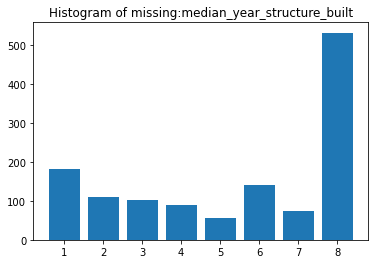

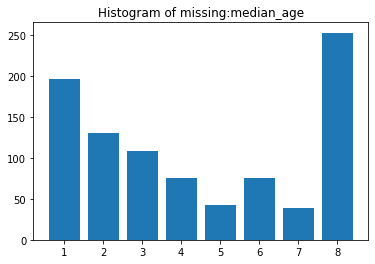

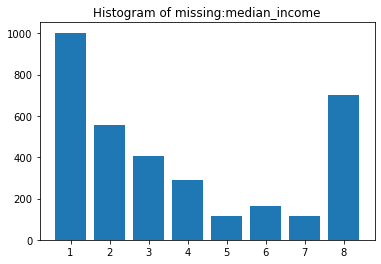

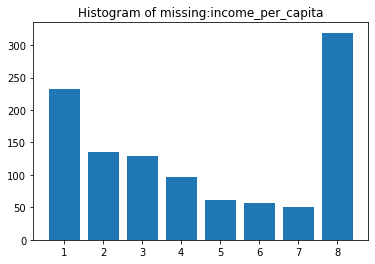

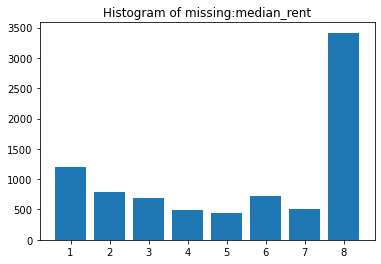

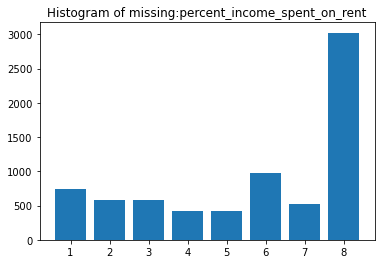

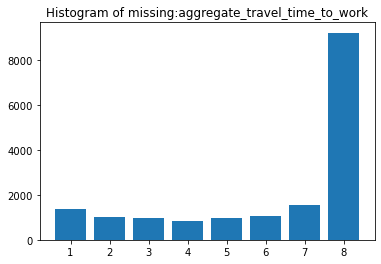

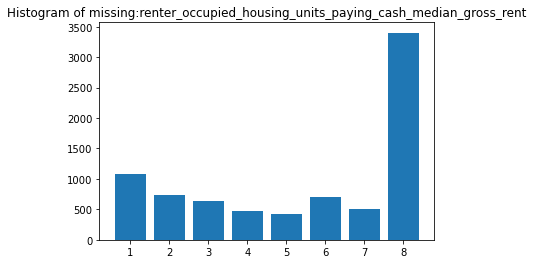

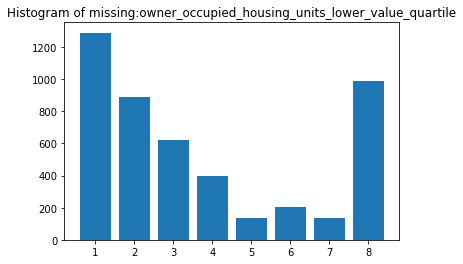

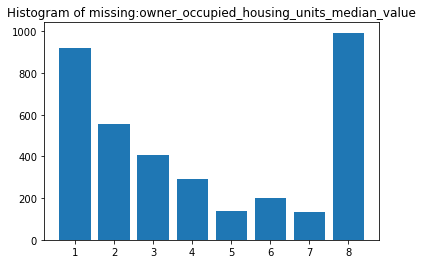

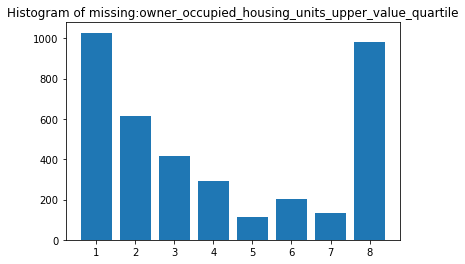

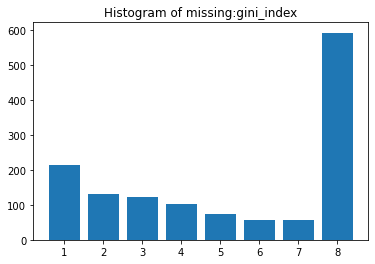

In [121]:
for col in curious_column:
    plot_missing(col);

In [162]:
temp = acs_data[curious_column]
mask = temp.apply(lambda x : bool(np.sum(x.isnull())), axis = 1)
temp = temp[mask]

In [163]:
temp["tot_missing"] = temp.apply(lambda x: np.sum(x.isnull()), axis = 1)

In [164]:
temp.reset_index(inplace = True)
temp_cnt = temp.groupby("tot_missing").agg("count")["geo_id"]


In [167]:
temp["tot_missing"].value_counts()

1     57806
4     23547
2      5004
5      4799
3      3463
12     3302
10     2483
6      2310
7      1724
8      1243
9      1067
11      995
Name: tot_missing, dtype: int64

In [174]:
missing_geo = temp["geo_id"].unique()

In [181]:
dict_col = {"geo_id": []};
for x in curious_column: dict_col[x] = [];

In [186]:
for geo in missing_geo:
    print(geo);
    for col in curious_column:
        dict_col["geo_id"].append(geo);
        dict_col[col].append(np.sum(temp[temp["geo_id"]==geo][col].isnull()))

601
606
616
622
631
647
652
653
664
690
694
704
707
714
715
731
735
740
741
765
772
775
780
786
901
906
909
911
913
934
936
950
951
960
968
1003
1005
1008
1009
1012
1022
1026
1029
1031
1034
1035
1037
1038
1053
1063
1066
1070
1074
1079
1080
1083
1084
1086
1088
1092
1093
1094
1097
1098
1103
1128
1199
1222
1224
1225
1229
1236
1240
1242
1243
1244
1245
1253
1254
1255
1256
1257
1258
1259
1260
1262
1264
1266
1270
1338
1342
1343
1346
1347
1349
1350
1351
1367
1375
1378
1434
1436
1438
1467
1468
1525
1537
1542
1561
1608
1611
1612
1718
1731
1740
1745
1827
1901
1921
1922
1929
1937
1944
1951
1983
1984
1985
2032
2047
2061
2071
2108
2110
2142
2163
2199
2203
2357
2366
2457
2462
2534
2535
2538
2539
2540
2542
2543
2553
2554
2556
2557
2558
2561
2564
2568
2575
2576
2584
2630
2633
2635
2637
2638
2639
2641
2643
2646
2647
2650
2651
2652
2653
2655
2657
2659
2663
2666
2667
2668
2669
2670
2671
2672
2675
2713
2715
2725
2738
2763
2764
2779
2791
2802
2804
2807
2808
2812
2815
2822
2826
2831
2833
2836
2839
2841
2858


13454
13459
13461
13464
13468
13469
13470
13472
13473
13475
13476
13477
13478
13483
13484
13485
13486
13488
13489
13490
13492
13494
13495
13602
13603
13606
13607
13612
13613
13614
13615
13616
13621
13622
13623
13628
13630
13633
13634
13636
13637
13638
13639
13640
13641
13643
13647
13650
13651
13654
13655
13656
13658
13659
13664
13665
13666
13667
13670
13672
13674
13675
13677
13678
13679
13680
13681
13682
13685
13687
13690
13692
13693
13694
13695
13696
13697
13731
13734
13739
13740
13744
13746
13748
13750
13751
13752
13755
13756
13757
13774
13775
13776
13777
13780
13782
13783
13784
13786
13787
13788
13794
13795
13796
13802
13804
13806
13807
13808
13809
13810
13812
13813
13826
13832
13833
13834
13838
13839
13841
13842
13843
13844
13845
13846
13847
13859
13860
13861
13863
13864
13902
14008
14025
14026
14028
14033
14034
14035
14037
14039
14041
14055
14060
14061
14068
14069
14082
14091
14102
14108
14109
14112
14113
14126
14130
14134
14135
14139
14143
14145
14168
14169
14170
14173
14202
1420

22448
22454
22460
22469
22473
22476
22480
22482
22488
22503
22504
22509
22511
22514
22529
22530
22534
22535
22538
22539
22542
22548
22567
22576
22578
22579
22610
22623
22624
22625
22627
22637
22639
22640
22641
22642
22643
22644
22646
22650
22652
22654
22656
22663
22709
22711
22713
22714
22715
22716
22718
22719
22720
22722
22723
22724
22726
22728
22729
22730
22731
22732
22733
22735
22736
22737
22738
22740
22741
22742
22743
22747
22749
22807
22810
22811
22820
22830
22831
22832
22834
22835
22841
22843
22845
22846
22847
22850
22904
22920
22922
22931
22935
22937
22938
22939
22940
22943
22946
22947
22948
22949
22952
22958
22959
22964
22967
22969
22971
22972
22974
22976
22989
23002
23004
23011
23015
23021
23022
23023
23025
23027
23032
23035
23038
23039
23040
23043
23045
23047
23050
23055
23056
23062
23064
23065
23066
23068
23069
23070
23071
23076
23079
23083
23084
23085
23089
23091
23092
23102
23106
23108
23109
23110
23115
23119
23120
23123
23124
23125
23126
23128
23129
23130
23138
23140
2314

28623
28624
28626
28627
28628
28629
28631
28635
28637
28640
28643
28644
28646
28647
28649
28652
28654
28660
28662
28663
28665
28666
28667
28668
28669
28670
28671
28672
28679
28682
28683
28684
28685
28689
28690
28693
28698
28701
28702
28707
28708
28709
28717
28718
28719
28720
28725
28726
28729
28730
28733
28735
28736
28740
28741
28742
28743
28745
28747
28749
28756
28757
28759
28761
28763
28766
28771
28772
28773
28774
28775
28778
28781
28783
28785
28789
28790
28901
28902
28904
28905
28909
29001
29003
29009
29014
29015
29030
29031
29037
29038
29039
29042
29046
29048
29051
29052
29056
29062
29065
29074
29079
29080
29081
29082
29104
29105
29112
29113
29117
29122
29125
29133
29137
29142
29145
29146
29147
29152
29163
29166
29168
29175
29202
29207
29208
29225
29320
29321
29324
29329
29331
29332
29333
29338
29346
29351
29355
29364
29368
29370
29373
29375
29377
29378
29384
29401
29404
29409
29423
29424
29426
29434
29435
29436
29437
29438
29439
29446
29448
29450
29452
29453
29458
29468
29469
2947

38392
38425
38450
38452
38453
38454
38455
38457
38459
38460
38461
38462
38471
38473
38475
38476
38481
38482
38486
38487
38504
38505
38541
38542
38543
38545
38547
38548
38549
38551
38552
38553
38554
38558
38559
38560
38564
38565
38567
38568
38569
38573
38575
38577
38578
38579
38580
38582
38587
38588
38589
38601
38603
38617
38619
38620
38621
38622
38623
38625
38626
38627
38629
38630
38631
38633
38639
38641
38642
38643
38644
38645
38647
38651
38658
38659
38661
38664
38665
38670
38673
38674
38676
38677
38685
38702
38704
38720
38721
38722
38723
38725
38726
38730
38731
38736
38737
38738
38740
38744
38745
38746
38749
38753
38754
38759
38760
38761
38762
38764
38765
38767
38768
38769
38771
38772
38773
38774
38778
38781
38827
38828
38833
38838
38841
38844
38846
38847
38848
38856
38857
38859
38860
38862
38864
38869
38870
38873
38876
38879
38913
38914
38915
38917
38920
38923
38924
38925
38927
38928
38929
38940
38941
38943
38944
38945
38946
38947
38948
38949
38950
38951
38952
38953
38954
38957
3895

46172
46175
46180
46182
46183
46216
46231
46259
46290
46301
46340
46345
46349
46365
46371
46374
46376
46377
46379
46381
46382
46393
46502
46508
46524
46531
46537
46553
46556
46570
46590
46595
46601
46635
46704
46705
46730
46731
46743
46745
46759
46760
46763
46764
46765
46766
46771
46772
46776
46779
46781
46786
46788
46791
46793
46794
46798
46799
46913
46914
46915
46917
46919
46920
46922
46930
46931
46932
46933
46940
46941
46943
46946
46950
46957
46958
46959
46960
46961
46967
46968
46978
46984
46985
46986
46987
46988
46990
46991
46994
46998
47003
47010
47011
47016
47017
47020
47024
47030
47034
47035
47036
47038
47104
47108
47110
47114
47115
47116
47117
47120
47123
47125
47126
47135
47140
47141
47142
47145
47147
47160
47161
47162
47163
47166
47175
47177
47223
47224
47226
47227
47230
47231
47234
47235
47244
47247
47263
47264
47270
47273
47280
47281
47282
47305
47306
47320
47324
47325
47335
47337
47339
47341
47344
47345
47351
47352
47354
47358
47360
47361
47367
47381
47382
47385
47386
4738

54561
54562
54563
54564
54565
54625
54632
54637
54641
54643
54644
54645
54653
54654
54657
54720
54731
54746
54748
54760
54765
54769
54805
54812
54813
54820
54826
54827
54828
54832
54836
54838
54839
54841
54842
54844
54845
54846
54850
54855
54857
54861
54862
54865
54867
54927
54928
54931
54933
54934
54946
54948
54964
54967
54979
54980
54985
55001
55005
55017
55018
55019
55020
55026
55029
55030
55032
55036
55054
55073
55085
55087
55090
55111
55150
55155
55327
55333
55366
55402
55415
55450
55455
55601
55602
55603
55605
55606
55607
55609
55612
55613
55614
55615
55702
55708
55710
55711
55712
55713
55716
55717
55721
55722
55724
55725
55726
55733
55736
55738
55742
55749
55750
55751
55752
55753
55756
55758
55763
55764
55765
55766
55768
55772
55775
55780
55781
55782
55784
55785
55786
55787
55793
55798
55802
55814
55905
55918
55919
55929
55931
55933
55935
55950
55951
55957
55961
55967
55968
55970
55973
55977
55982
55983
55990
55991
56016
56020
56022
56025
56032
56033
56034
56035
56039
56043
5604

59830
59831
59832
59834
59837
59840
59841
59842
59843
59844
59845
59846
59848
59851
59853
59854
59855
59856
59858
59859
59860
59863
59865
59866
59867
59868
59871
59872
59873
59874
59875
59910
59913
59914
59915
59916
59917
59918
59919
59920
59922
59923
59925
59926
59927
59928
59929
59930
59931
59932
59933
59934
59936
60021
60029
60043
60072
60088
60109
60111
60112
60113
60129
60136
60141
60144
60157
60184
60301
60437
60456
60461
60474
60479
60512
60519
60530
60536
60539
60549
60557
60602
60603
60604
60606
60910
60912
60917
60919
60920
60921
60922
60926
60928
60930
60931
60932
60933
60934
60936
60942
60945
60946
60949
60952
60958
60959
60960
60961
60962
60966
60968
60969
60973
60974
61007
61011
61013
61014
61015
61016
61018
61027
61031
61037
61038
61041
61042
61043
61044
61049
61050
61052
61054
61057
61059
61067
61077
61079
61089
61091
61112
61230
61232
61236
61239
61240
61242
61243
61251
61257
61258
61259
61260
61261
61262
61263
61274
61276
61278
61279
61281
61282
61283
61284
61311
6131

66010
66013
66014
66016
66017
66019
66020
66023
66024
66026
66027
66031
66033
66039
66041
66042
66045
66056
66058
66064
66066
66072
66073
66075
66076
66078
66079
66087
66090
66091
66093
66094
66095
66097
66105
66115
66118
66207
66211
66218
66220
66227
66402
66403
66404
66406
66407
66408
66409
66411
66412
66415
66416
66417
66418
66419
66422
66423
66424
66425
66427
66428
66429
66431
66432
66438
66442
66449
66451
66501
66506
66507
66508
66510
66514
66515
66516
66517
66518
66520
66522
66523
66526
66527
66528
66531
66532
66533
66534
66535
66537
66538
66540
66541
66542
66543
66544
66546
66548
66552
66554
66603
66606
66607
66608
66609
66611
66612
66615
66616
66618
66619
66621
66622
66710
66711
66712
66713
66714
66716
66717
66724
66728
66732
66733
66734
66735
66736
66738
66739
66740
66741
66743
66746
66748
66749
66751
66753
66754
66755
66756
66757
66758
66760
66761
66763
66767
66769
66770
66771
66772
66773
66775
66776
66777
66778
66779
66780
66781
66782
66830
66833
66834
66835
66838
66839
6684

71944
71945
71949
71950
71952
71953
71956
71957
71958
71959
71960
71961
71962
71964
71965
71968
71969
71970
71971
71972
71973
71998
71999
72001
72003
72004
72005
72006
72010
72013
72014
72016
72017
72021
72024
72025
72026
72027
72029
72030
72035
72036
72037
72038
72039
72040
72041
72042
72044
72045
72047
72048
72051
72055
72057
72059
72060
72061
72063
72064
72067
72068
72069
72070
72072
72073
72074
72079
72080
72081
72082
72083
72084
72085
72087
72088
72099
72102
72107
72108
72111
72119
72121
72122
72123
72125
72127
72128
72129
72130
72134
72135
72136
72137
72139
72140
72141
72142
72149
72152
72153
72156
72157
72160
72165
72166
72167
72168
72169
72170
72175
72179
72181
72201
72202
72207
72227
72311
72320
72321
72322
72325
72326
72327
72328
72329
72330
72332
72333
72338
72339
72340
72341
72342
72346
72347
72348
72350
72351
72353
72355
72358
72359
72365
72366
72367
72368
72372
72373
72374
72376
72377
72379
72383
72384
72389
72390
72392
72394
72395
72410
72411
72412
72413
72414
72415
7241

78387
78389
78391
78393
78401
78402
78404
78405
78406
78407
78408
78409
78416
78417
78419
78535
78536
78543
78545
78548
78549
78558
78559
78560
78561
78562
78563
78564
78565
78567
78569
78576
78579
78583
78584
78585
78588
78590
78591
78592
78593
78594
78597
78598
78607
78608
78609
78614
78615
78616
78618
78619
78622
78623
78631
78632
78635
78638
78639
78648
78650
78656
78657
78659
78661
78662
78663
78670
78671
78672
78675
78677
78701
78712
78719
78722
78725
78726
78730
78742
78756
78802
78827
78828
78829
78830
78832
78833
78834
78836
78837
78838
78839
78843
78850
78851
78860
78861
78870
78871
78872
78873
78877
78879
78880
78881
78883
78884
78885
78886
78931
78932
78933
78934
78935
78938
78941
78943
78944
78946
78948
78949
78950
78951
78953
78954
78956
78959
78963
79001
79003
79005
79007
79009
79010
79011
79012
79013
79014
79016
79018
79019
79021
79022
79024
79025
79027
79029
79031
79032
79033
79034
79035
79039
79040
79041
79043
79044
79046
79051
79052
79053
79054
79056
79057
79058
7905

85924
85925
85926
85927
85928
85929
85930
85931
85932
85933
85934
85935
85936
85938
85939
85940
85941
85942
86003
86011
86015
86016
86017
86018
86020
86021
86022
86023
86024
86025
86028
86029
86030
86031
86032
86033
86034
86035
86036
86038
86039
86042
86043
86044
86045
86052
86053
86054
86301
86313
86315
86320
86321
86324
86325
86327
86329
86331
86332
86333
86334
86335
86336
86337
86338
86343
86351
86403
86404
86406
86411
86429
86431
86432
86433
86434
86435
86436
86437
86438
86441
86443
86444
86445
86502
86504
86506
86507
86508
86511
86512
86515
86520
86535
86538
86540
86544
86545
86547
86556
87005
87006
87007
87008
87010
87011
87012
87013
87014
87016
87017
87018
87020
87021
87022
87023
87024
87025
87027
87028
87029
87032
87034
87035
87036
87037
87038
87040
87041
87042
87043
87044
87045
87046
87047
87049
87051
87052
87053
87056
87061
87062
87063
87064
87070
87072
87083
87116
87117
87301
87305
87310
87311
87312
87313
87315
87316
87317
87319
87320
87321
87322
87323
87325
87326
87327
8732

97498
97499
97522
97523
97525
97531
97532
97534
97535
97536
97538
97539
97540
97541
97543
97544
97604
97620
97621
97622
97623
97624
97625
97626
97627
97630
97632
97633
97634
97635
97636
97637
97638
97639
97640
97641
97707
97710
97711
97712
97720
97721
97722
97730
97731
97732
97733
97735
97736
97737
97738
97739
97750
97751
97752
97753
97758
97761
97810
97812
97813
97814
97817
97818
97819
97820
97823
97824
97825
97826
97827
97828
97830
97833
97834
97835
97836
97837
97839
97840
97841
97842
97843
97845
97846
97848
97856
97857
97859
97864
97865
97867
97868
97869
97870
97873
97874
97875
97876
97877
97880
97882
97884
97885
97886
97901
97903
97904
97905
97906
97907
97908
97909
97910
97911
97920
98039
98050
98068
98070
98134
98154
98158
98164
98174
98195
98207
98220
98222
98224
98232
98235
98236
98238
98239
98240
98241
98243
98244
98249
98250
98253
98255
98256
98260
98261
98262
98263
98266
98267
98276
98278
98279
98280
98281
98283
98286
98288
98294
98297
98303
98304
98305
98314
98315
98320
9832

In [192]:
temp2 = temp.groupby("geo_id").agg(lambda x: sum(x.isnull()));

In [196]:
temp3 = temp2.copy();

In [197]:
temp3.drop("aggregate_travel_time_to_work", axis = 1, inplace = True);

In [204]:
temp3["missing_max"] = temp3.apply(lambda x: max(x), axis = 1);
temp3["missing_min"] = temp3.apply(lambda x: min(x), axis = 1);


In [205]:
temp3["missing_max"].value_counts()

0.0    7559
8.0    3742
1.0    1674
2.0    1067
3.0     903
6.0     669
4.0     646
7.0     546
5.0     443
Name: missing_max, dtype: int64

In [206]:
temp3["missing_min"].value_counts()

0.0    17249
Name: missing_min, dtype: int64

In [207]:
temp3.drop(["missing_max", "missing_min", "median_rent", "percent_income_spent_on_rent", "renter_occupied_housing_units_paying_cash_median_gross_rent"], axis =1, inplace = True);

In [208]:
temp3["missing_max"] = temp3.apply(lambda x: max(x), axis = 1);
temp3["missing_min"] = temp3.apply(lambda x: min(x), axis = 1);


In [209]:
temp3["missing_max"].value_counts()

0.0    10927
1.0     1716
2.0     1269
8.0     1028
3.0     1028
4.0      749
6.0      216
5.0      159
7.0      157
Name: missing_max, dtype: int64